<a href="https://colab.research.google.com/github/sonamkshenoy/Deep-Learning-Models/blob/master/MPNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets # sklearn very important tool in ML. Use "datasets" package of this tool to use its provided dataset
import numpy as np
import pandas as pd

# Loading Dataset

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer() # Breast_cancer dataset provided by sklearn
X = breast_cancer.data # the input
Y = breast_cancer.target # the output
# The names (labels) of the input and output are available as "feature_names" and "target_names" respectively

In [0]:
# print(X.head(), Y.head()) Error: Still a numpy array, not yet Pandas dataframe. To convert to dataframe, X = pd.DataFrame(X)
print(X)
print(X.shape, Y.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30) (569,)


In [0]:
data = pd.DataFrame(X, columns = breast_cancer.feature_names) # Convert to dataframe, for ease of seeing and all further computations. "columns" parameter is used to give labels to the column, else defaults to range index (0,1,2,3,...), like the rows. (Analogues to "index" parameter of rows) 
# pd.DataFrame(<the_dataset-data>,<x_index-index>,<y_index-columns>)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data['class'] = breast_cancer.target # Method to add a column to a dataframe
# This is the output column. All the other columns already existing before this, were the input columns

In [0]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [0]:
print(breast_cancer.target_names)
# Remember : "feature_names" for input labels and "target_names" for output labels

['malignant' 'benign']


In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Test Train Split

In [0]:
from sklearn.model_selection import train_test_split # New package: model_selection (previously, "datasets")
X = data.drop('class', axis=1) # Drops specified from row(axis=0)/column(axis=1) without altering original dataset
Y = data['class']

In [0]:
type(X) # as expected Pandas Dataframe

pandas.core.frame.DataFrame

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)
# The basic split
# By default splits as 0.8 (train:test). To change, "test_size" parameter
# "stratify" to split the dataset into train and test, such that means of Y are similar (and not far apart) in train and test
# "random_state" : seed, so that same splitting happens each time this command is run (exactly same data in train and test). Can be any constant value

In [0]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [0]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

# Binarization of input

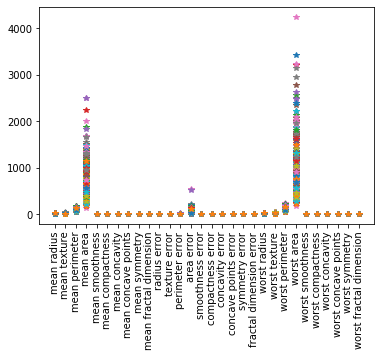

In [0]:
# Inputs of MP Neuron should be binary only, but now real
# Method 1 (Manual):

import matplotlib.pyplot as plt
plt.plot(X_train.T, '*') # To analyse distribution of data points, so as to choose threshold above which data points are 1 and 0
plt.xticks(rotation='vertical') # Just making it neat. Can specify, at exactly what points to place labels, how to align the labels, etc
plt.show()

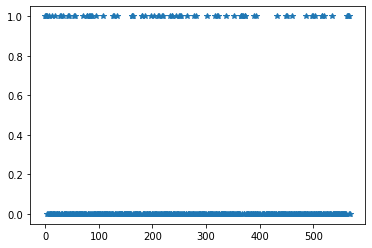

In [0]:
X_binarised_3_train = X_train['mean area'].map(lambda x:0 if x<1000 else 1) # Just binarising one feature i.e. mean_area since 1000 seems to be the middle value for this particular feature
plt.plot(X_binarised_3_train, '*') # The plot is just for mean_area (value vs index)
##### BINARISING DONE ####

In [0]:
# Method 2 (library)
# Another advantage : binarises all the features at one go (if manually, have to do separately for each column)
X_binarised_train = X_train.apply(pd.cut, bins=2, labels = [1,0]) # Applying the function (pd.cut) to each column (each feature) of X_train.

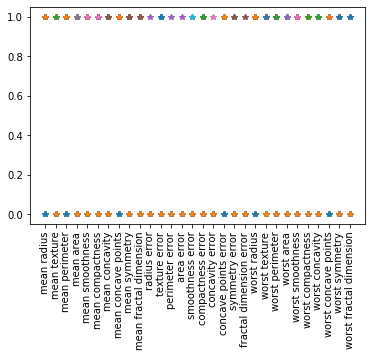

In [0]:
plt.plot(X_binarised_train.T, '*') # See. Unlike X_binarised_3_train which we did manually and plotted only that column after binarising, here we are plotting all columns at once, since all have been binarised
plt.xticks(rotation='vertical')
plt.show()

In [0]:
# Remember to binarise even the test data (input, since output is already binary)
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0]) # Changed labels from [0,1] to [1,0], since that's how Pandas has classified the data points
# Those outputs in Y_train and Y_test are such that 1 for malignant and 0 for benign, but what Panda's cut did, was classify those features above a certain level as benign ( class = 0 ) and those below that level as malignant (class = 1).
# We need to reverse this, to match Y with X
type(X_binarised_test)

# Run below lines only once, since the next time, those variables would've been converted to numpy arrays already, so can't use "values" attribute on it
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values
type(X_binarised_test)

numpy.ndarray

# MP Neuron model

In [0]:
# Now build model, only one parameter
b = 3

[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
6


In [0]:
# Just practice how to access rows/columns
# print(X_binarised_train[0])
# print(np.sum(X_binarised_train[0]))

# 1 => malignant
# 0 => benign


# Test accuracy of the parameter value you assigned to b
# accuracy_count = 0

# Wrong because all indices from 0 to np.shape(arr)[1]/arr.shape()[1] needn't exist.
# So best way to iterate will be to, take each element without using index (like x,y in ...)
# for i in range(X_binarised_train.shape[0]):
#   if(np.sum(X_binarised_train[i])>b and Y_train[i]==1):
#     accuracy_count += 1
#   elif(np.sum(X_binarised_train[i])<b and Y_train[i]==0):
#     accuracy_count+=1
#   else:
#     pass

# total_accuracy = accuracy_count/X_binarised_train.shape[0]*100

# print("The accuracy for b with value of ",b,"is ",total_accuracy)
# for i in range(20):
#   print(Y_train[i])

# print(X_binarised_train.shape)

In [0]:
b = 3

# np.shape(arr)[0] gives number of rows

accurate_rows = 0
Y_pred_train = []

for x,y in zip(X_binarised_train, Y_train):
  y_pred = np.sum(x)>=b # Note the notation: "y_pred"
  Y_pred_train.append(y_pred)
  accurate_rows += (y_pred==y)

print(accurate_rows, accurate_rows*100/X_binarised_train.shape[0])

77 15.0390625


In [0]:
for b in range(X_binarised_train.shape[1]+1):
  accurate_rows = 0
  Y_pred_train = []

  for x,y in zip(X_binarised_train, Y_train):
    y_pred = np.sum(x)>=b # Note the notation: "y_pred"
    Y_pred_train.append(y_pred)
    accurate_rows += (y_pred==y)

  print(b, accurate_rows*100/X_binarised_train.shape[0])

0 62.6953125
1 62.6953125
2 62.6953125
3 62.6953125
4 62.6953125
5 62.6953125
6 62.6953125
7 62.6953125
8 62.6953125
9 62.6953125
10 62.6953125
11 62.6953125
12 62.6953125
13 62.6953125
14 63.0859375
15 63.28125
16 64.2578125
17 64.84375
18 65.625
19 66.40625
20 67.1875
21 68.75
22 70.1171875
23 72.4609375
24 75.5859375
25 78.515625
26 81.8359375
27 84.5703125
28 84.9609375
29 81.4453125
30 75.9765625


In [0]:
# Test on test data

from sklearn.metrics import accuracy_score

b = 28 # parameter for which accuracy was greatest on train data

Y_pred_test = [] # To use accuracy_score on
for x in X_binarised_test:
  y_pred = np.sum(x)>=b
  Y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_pred_test, Y_test)

print("Accuracy for test data with parameter value ",b," is ",accuracy*100)

Accuracy for test data with parameter value  28  is  78.94736842105263


End of MP Neuron